# 07. Software Development and Data Analysis Agents

# 安装依赖

In [ ]:
%uv pip install langchain~=1.0 langchain-core~=1.0 langchain-community~=0.4 langgraph~=1.0

Resolved 60 packages in 59ms                                         
Uninstalled 1 package in 19ms
░░░░░░░░░░░░░░░░░░░░ [0/1] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 751ms0.4.1                           
 - langchain-community==1.0.0a1
 + langchain-community==0.4.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
%uv pip install langchain-anthropic~=1.0 langchain-openai~=1.0

Resolved 35 packages in 549ms                                        
⠙ Preparing packages... (0/2)                                                   
⠙ Preparing packages... (0/2)--------------     0 B/362.77 KiB          
⠙ Preparing packages... (0/2)-------------- 14.91 KiB/362.77 KiB        
⠙ Preparing packages... (0/2)-------------- 14.91 KiB/362.77 KiB        
langchain-anthropic  ------------------------------     0 B/46.67 KiB
⠙ Preparing packages... (0/2)-------------- 14.91 KiB/362.77 KiB        
langchain-anthropic  ------------------------------ 14.85 KiB/46.67 KiB
⠹ Preparing packages... (0/2)-------------- 14.91 KiB/362.77 KiB        
langchain-anthropic  ------------------------------ 14.85 KiB/46.67 KiB
⠹ Preparing packages... (0/2)-------------- 14.91 KiB/362.77 KiB        
langchain-anthropic  ------------------------------ 14.85 KiB/46.67 KiB
⠹ Preparing packages... (0/2)-------------- 30.91 KiB/362.77 KiB        
langchain-anthropic  ------------------------------ 

In [4]:
%uv pip install python-dotenv~=1.1

Audited 1 package in 1ms
Note: you may need to restart the kernel to use updated packages.


工具类

In [1]:
import os

import dotenv
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_anthropic import ChatAnthropic


class Config:
    def __init__(self):
        # By default, load_dotenv doesn't override existing environment variables and looks for a .env file in same directory as python script or searches for it incrementally higher up.
        dotenv_path = dotenv.find_dotenv(usecwd=True)
        if not dotenv_path:
            raise ValueError("No .env file found")
        dotenv.load_dotenv(dotenv_path=dotenv_path)

        api_key = os.getenv("OPENAI_API_KEY")
        if not api_key:
            raise ValueError("OPENAI_API_KEY is not set")

        base_url = os.getenv("OPENAI_API_BASE_URL")
        if not base_url:
            raise ValueError("OPENAI_API_BASE_URL is not set")

        model = os.getenv("OPENAI_MODEL")
        if not model:
            raise ValueError("OPENAI_MODEL is not set")

        coder_model = os.getenv("OPENAI_CODER_MODEL")
        if not coder_model:
            raise ValueError("OPENAI_MODEL is not set")

        self.api_key = api_key
        self.base_url = base_url
        self.model = model
        self.coder_model = coder_model

        self.anthropic_api_key = os.getenv("ANTHROPIC_API_KEY")
        self.anthropic_base_url = os.getenv("ANTHROPIC_BASE_URL")
        self.anthropic_model = os.getenv("ANTHROPIC_MODEL")

        self.embeddings_model = os.getenv("OPENAI_EMBEDDINGS_MODEL")

        hf_pretrained_embeddings_model = os.getenv("HF_PRETRAINED_EMBEDDINGS_MODEL")
        self.hf_pretrained_embeddings_model = (
            hf_pretrained_embeddings_model
            if hf_pretrained_embeddings_model
            else "Qwen/Qwen3-Embedding-8B"
        )

    def new_anthropic(self, **kwargs) -> ChatAnthropic:
        # 参考：https://bailian.console.aliyun.com/?tab=api#/api/?type=model&url=2587654
        # 参考：https://help.aliyun.com/zh/model-studio/models
        # ChatOpenAI 文档参考：https://python.langchain.com/api_reference/openai/chat_models/langchain_openai.chat_models.base.ChatOpenAI.html#langchain_openai.chat_models.base.ChatOpenAI
        return ChatAnthropic(
            api_key=self.anthropic_api_key,
            base_url=self.anthropic_base_url,
            model=self.anthropic_model,
            **kwargs,
        )

    def new_openai_like_coder(self, **kwargs) -> ChatOpenAI:
        # 参考：https://bailian.console.aliyun.com/?tab=api#/api/?type=model&url=2587654
        # 参考：https://help.aliyun.com/zh/model-studio/models
        # ChatOpenAI 文档参考：https://python.langchain.com/api_reference/openai/chat_models/langchain_openai.chat_models.base.ChatOpenAI.html#langchain_openai.chat_models.base.ChatOpenAI
        return ChatOpenAI(
            api_key=self.api_key,
            base_url=self.base_url,
            model=self.coder_model,
            **kwargs,
        )

    def new_openai_like(self, **kwargs) -> ChatOpenAI:
        # 参考：https://bailian.console.aliyun.com/?tab=api#/api/?type=model&url=2587654
        # 参考：https://help.aliyun.com/zh/model-studio/models
        # ChatOpenAI 文档参考：https://python.langchain.com/api_reference/openai/chat_models/langchain_openai.chat_models.base.ChatOpenAI.html#langchain_openai.chat_models.base.ChatOpenAI
        model = kwargs.pop("model", self.model)
        return ChatOpenAI(
            api_key=self.api_key, base_url=self.base_url, model=model, **kwargs
        )

    def new_openai_like_embeddings(self, **kwargs) -> OpenAIEmbeddings:
        if not self.embeddings_model:
            raise ValueError("OPENAI_EMBEDDINGS_MODEL is not set")
        # print("embeddings_model:", self.embeddings_model)

        # 参考：https://python.langchain.com/api_reference/openai/embeddings/langchain_openai.embeddings.base.OpenAIEmbeddings.html#langchain_openai.embeddings.base.OpenAIEmbeddings
        return OpenAIEmbeddings(
            api_key=self.api_key,
            base_url=self.base_url,
            model=self.embeddings_model,
            # https://python.langchain.com/api_reference/openai/embeddings/langchain_openai.embeddings.base.OpenAIEmbeddings.html#langchain_openai.embeddings.base.OpenAIEmbeddings.tiktoken_enabled
            # 对于非 OpenAI 的官方实现，将这个参数置为 False。
            # 回退到用 huggingface transformers 库 AutoTokenizer 来处理 token。
            tiktoken_enabled=False,
            # https://python.langchain.com/api_reference/openai/embeddings/langchain_openai.embeddings.base.OpenAIEmbeddings.html#langchain_openai.embeddings.base.OpenAIEmbeddings.model
            # 元宝说 Jina 的 embedding 模型 https://huggingface.co/jinaai/jina-embeddings-v4 最接近
            # text-embedding-ada-002
            # 个人喜好，选了 Qwen/Qwen3-Embedding-8B
            # tiktoken_model_name='Qwen/Qwen3-Embedding-8B',
            tiktoken_model_name=self.hf_pretrained_embeddings_model,
            **kwargs,
        )


def must_get_hfh_api_token() -> str:
    """
    从环境变量或者 .env 环境获取 HuggingFaceHub 的 API 令牌
    """
    # By default, load_dotenv doesn't override existing environment variables and looks for a .env file in same directory as python script or searches for it incrementally higher up.
    dotenv_path = dotenv.find_dotenv(usecwd=True)
    if not dotenv_path:
        raise ValueError("No .env file found")
    dotenv.load_dotenv(dotenv_path=dotenv_path)

    out = os.getenv("HUGGINGFACEHUB_API_TOKEN")
    if not out:
        raise ValueError("HUGGINGFACEHUB_API_TOKEN is not set")

    return out

/github.com/sammyne/generative-ai-with-lang-chain-2ed/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## LLMs in software development
### The future of development
### Implementation considerations
### Evolution of code LLMs
### Benchmarks for code LLMs
### LLM-based software engineering approaches
### Security and risk mitigation
### Validation framework for LLM-generated code
### LangChain integrations
## Writing code with LLMs
### Google generative AI
replaced by Qwen as

In [8]:
question = """
Given an integer n, return a string array answer (1-indexed) where:

answer[i] == "FizzBuzz" if i is divisible by 3 and 5.
answer[i] == "Fizz" if i is divisible by 3.
answer[i] == "Buzz" if i is divisible by 5.
answer[i] == i (as a string) if none of the above conditions are true.
"""

llm = Config().new_openai_like_coder()

# 调用 print 格式化输出
print(llm.invoke(question).content)

Looking at this FizzBuzz problem, I need to iterate through numbers from 1 to n and apply the given conditions.

Let me break down the logic:
- If divisible by both 3 and 5 → "FizzBuzz"
- If divisible by 3 only → "Fizz" 
- If divisible by 5 only → "Buzz"
- Otherwise → the number as string

Here's my solution:

```python
def fizzBuzz(n):
    answer = []
    
    for i in range(1, n + 1):
        if i % 3 == 0 and i % 5 == 0:
            answer.append("FizzBuzz")
        elif i % 3 == 0:
            answer.append("Fizz")
        elif i % 5 == 0:
            answer.append("Buzz")
        else:
            answer.append(str(i))
    
    return answer
```

Alternative approach (checking divisibility by 15 for cleaner code):

```python
def fizzBuzz(n):
    answer = []
    
    for i in range(1, n + 1):
        if i % 15 == 0:  # divisible by both 3 and 5
            answer.append("FizzBuzz")
        elif i % 3 == 0:
            answer.append("Fizz")
        elif i % 5 == 0:
            answe

### Hugging Face [没跑通]

In [6]:
# Define the input text
text = """
def calculate_primes(n):
    \"\"\"Create a list of consecutive integers from 2 up to N.

    For example:
    >>> calculate_primes(20)
    Output: [2, 3, 5, 7, 11, 13, 17, 19]
    \"\"\"
"""

In [7]:
%uv pip install huggingface-hub~=0.35

Resolved 13 packages in 481ms                                        
⠙ Preparing packages... (0/4)                                                   
⠙ Preparing packages... (0/4)--------------     0 B/196.26 KiB          
⠙ Preparing packages... (0/4)--------------     0 B/196.26 KiB          
fsspec               ------------------------------     0 B/196.26 KiB
⠙ Preparing packages... (0/4)--------------     0 B/552.83 KiB          
fsspec               ------------------------------     0 B/196.26 KiB
⠙ Preparing packages... (0/4)--------------     0 B/552.83 KiB          
fsspec               ------------------------------     0 B/196.26 KiB
⠙ Preparing packages... (0/4)--------------     0 B/552.83 KiB          
filelock             ------------------------------     0 B/15.68 KiB
fsspec               ------------------------------     0 B/196.26 KiB
⠙ Preparing packages... (0/4)--------------     0 B/552.83 KiB          
filelock             ------------------------------     0

In [8]:
from langchain.llms import HuggingFaceHub

# Choose a lightweight model good for code generation
repo_id = "bigcode/starcoder"

# Initialize the HuggingFaceHub LLM
llm = HuggingFaceHub(
    repo_id=repo_id,
    task="text-generation",
    model_kwargs={"temperature": 0.5, "max_length": 1000},
    huggingfacehub_api_token=must_get_hfh_api_token(),
)

# Use the LangChain LLM to generate text
output = llm.invoke(text)
print(output)

/tmp/ipykernel_2771350/1608604917.py:7: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  llm = HuggingFaceHub(
/github.com/sammyne/generative-ai-with-lang-chain-2ed/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'InferenceClient' object has no attribute 'post'

In [9]:
%uv pip install langchain-huggingface~=0.3

Resolved 32 packages in 572ms                                        
⠙ Preparing packages... (0/2)                                                   
⠙ Preparing packages... (0/2)--------------     0 B/3.10 MiB            
⠙ Preparing packages... (0/2)---------------     0 B/3.10 MiB           
langchain-huggingface ------------------------------     0 B/26.96 KiB
⠙ Preparing packages... (0/2)---------------     0 B/3.10 MiB           
langchain-huggingface ------------------------------ 16.00 KiB/26.96 KiB
⠙ Preparing packages... (0/2)---------------     0 B/3.10 MiB           
langchain-huggingface ------------------------------ 26.96 KiB/26.96 KiB
⠙ Preparing packages... (0/2)---------------     0 B/3.10 MiB           
langchain-huggingface ------------------------------ 26.96 KiB/26.96 KiB
⠙ Preparing packages... (0/2)---------------     0 B/3.10 MiB           
⠹ Preparing packages... (1/2)---------------     0 B/3.10 MiB           
⠹ Preparing packages... (1/2)---------------    

In [10]:
from langchain_huggingface import HuggingFaceEndpoint

# Choose a lightweight model good for code generation
repo_id = "bigcode/starcoder"

# Initialize the HuggingFaceHub LLM
# llm = HuggingFaceHub(
#     repo_id=repo_id,
#     task="text-generation",
#     model_kwargs={"temperature": 0.5, "max_length": 1000},
#     huggingfacehub_api_token=must_get_hfh_api_token(),
# )

llm = HuggingFaceEndpoint(
    repo_id=repo_id,
    # max_length=128,
    temperature=0.5,
    huggingfacehub_api_token=must_get_hfh_api_token(),
    provider="huggingface",  # set your provider here hf.co/settings/inference-providers
    # provider="hyperbolic",
    # provider="nebius",
    # provider="together",
)

# Use the LangChain LLM to generate text
output = llm.invoke(text)
print(output)

ValueError: Provider 'huggingface' not supported. Available values: 'auto' or any provider from ['black-forest-labs', 'cerebras', 'clarifai', 'cohere', 'fal-ai', 'featherless-ai', 'fireworks-ai', 'groq', 'hf-inference', 'hyperbolic', 'nebius', 'novita', 'nscale', 'openai', 'publicai', 'replicate', 'sambanova', 'scaleway', 'together', 'zai-org'].Passing 'auto' (default value) will automatically select the first provider available for the model, sorted by the user's order in https://hf.co/settings/inference-providers.

### Anthropic

In [10]:
# Define the input text
text = """
def calculate_primes(n):
    \"\"\"Create a list of consecutive integers from 2 up to N.

    For example:
    >>> calculate_primes(20)
    Output: [2, 3, 5, 7, 11, 13, 17, 19]
    \"\"\"
"""

In [11]:
from langchain_core.prompts.prompt import PromptTemplate

template = """Question: {question}
Let's think step by step.

Answer:
"""

prompt = PromptTemplate(template=template, input_variables=["question"])
llm = Config().new_anthropic()

llm_chain = prompt | llm
print(llm_chain.invoke(text).content)

I need to implement the `calculate_primes` function that returns all prime numbers from 2 up to n using the Sieve of Eratosthenes algorithm.

Let me think through the steps:

1. Create a boolean list to track which numbers are prime (initially assume all are prime)
2. Mark 0 and 1 as non-prime (though we start from 2 anyway)
3. Iterate through numbers from 2 to √n
4. For each prime number found, mark all its multiples as non-prime
5. Collect all numbers that remain marked as prime

Here's my implementation:

```python
def calculate_primes(n):
    """Create a list of consecutive integers from 2 up to N.

    For example:
    >>> calculate_primes(20)
    Output: [2, 3, 5, 7, 11, 13, 17, 19]
    """
    if n < 2:
        return []
    
    # Create a boolean list "prime[0..n]" and initialize all entries as True
    prime = [True] * (n + 1)
    prime[0] = prime[1] = False  # 0 and 1 are not prime numbers
    
    # Start with the first prime number, 2
    p = 2
    while p * p <= n:
      

### Agentic approach

In [12]:
%uv pip install 'langchain-experimental~=0.4'

Resolved 47 packages in 63ms                                         
░░░░░░░░░░░░░░░░░░░░ [0/1] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 93msal==0.4.0                        
 + langchain-experimental==0.4.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
from langchain.agents import create_agent
from langchain_experimental.tools import PythonREPLTool

responses = ["Action: Python_REPL\nAction Input: print(2 + 2)", "Final Answer: 4"]
llm = Config().new_openai_like()

tools = [PythonREPLTool()]
agent = create_agent(model=llm, tools=tools, debug=True)

input = {"messages": [("user", "What is 2 + 2?")]}
result = agent.invoke(input)

[values] {'messages': [HumanMessage(content='What is 2 + 2?', additional_kwargs={}, response_metadata={}, id='fbbfb1c6-49c2-4142-a20e-206360047b44')]}
[updates] {'model': {'messages': [AIMessage(content='2 + 2 equals 4.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 296, 'total_tokens': 304, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_provider': 'openai', 'model_name': 'qwen3-max-2025-09-23', 'system_fingerprint': None, 'id': 'chatcmpl-ea6b695d-92cf-4a87-aa44-4db8b499cb0a', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--b0eb46b0-adc6-4c23-a614-75cd95d0edcb-0', usage_metadata={'input_tokens': 296, 'output_tokens': 8, 'total_tokens': 304, 'input_token_details': {}, 'output_token_details': {}})]}}
[values] {'messages': [HumanMessage(content='What is 2 + 2?', additional_kwargs={}, response_metadata={}, id='fbbfb1c6-49c2-4142-a20e-206360047b44'), AIMessage(content='2 + 2 equals 4.', ad

In [4]:
print(result["messages"][-1].content)

2 + 2 equals 4.


In [5]:
from langchain.agents import create_agent

llm = Config().new_openai_like_coder()

agent = create_agent(model=llm, tools=tools, debug=True)

input = {"messages": [("user", "What are the prime numbers until 20?")]}
result = agent.invoke(input)

[values] {'messages': [HumanMessage(content='What are the prime numbers until 20?', additional_kwargs={}, response_metadata={}, id='61f44c19-5f8d-4b09-a57c-b191f88c7b05')]}


Python REPL can execute arbitrary code. Use with caution.


[updates] {'model': {'messages': [AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 98, 'prompt_tokens': 321, 'total_tokens': 419, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'qwen3-coder-plus-2025-09-23', 'system_fingerprint': None, 'id': 'chatcmpl-bf92b640-22bc-4e59-9e78-02cf44a359d3', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--fe76469b-6b80-47f2-8797-69ad9a31374f-0', tool_calls=[{'name': 'Python_REPL', 'args': {'query': 'def is_prime(n):\n    if n <= 1:\n        return False\n    for i in range(2, int(n**0.5) + 1):\n        if n % i == 0:\n            return False\n    return True\n\nprime_numbers = [n for n in range(2, 21) if is_prime(n)]\nprint(prime_numbers)'}, 'id': 'call_d0fc7f7b8a114d529f13e0cb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 321, 'output_tokens': 98, 'total_tokens': 4

In [6]:
print(result["messages"][-1].content)

The prime numbers until 20 are: 2, 3, 5, 7, 11, 13, 17, and 19.


### Documentation RAG

In [19]:
%uv pip install beautifulsoup4~=4.14 lxml~=6.0 nest-asyncio~=1.6

Audited 3 packages in 5ms
Note: you may need to restart the kernel to use updated packages.


In [20]:
from langchain_community.document_loaders import DocusaurusLoader

import nest_asyncio


nest_asyncio.apply()

loader = DocusaurusLoader("https://docs.langchain.com")
# TODO: 解决内存不足导致加载很慢的问题
documents = loader.load()

USER_AGENT environment variable not set, consider setting it to identify your requests.
Fetching pages:  51%|#####1    | 248/483 [02:36<03:00,  1.30it/s]Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <_contextvars.Context object at 0x7f2c269f1640> is already entered
Fetching pages:  52%|#####1    | 250/483 [02:37<02:47,  1.39it/s]Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <_contextvars.Context object at 0x7f2c269f1640> is already entered
Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/usr/local/lib/pyt

In [21]:
documents[0]

Document(metadata={'source': 'https://docs.langchain.com', 'loc': 'https://docs.langchain.com', 'lastmod': '2025-11-17T20:55:52.292Z'}, page_content="Home - Docs by LangChainSkip to main content🚀 Share how you're building agents for a chance to win LangChain swag!Docs by LangChain home pageHomeSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationDocumentationLangChain is the platform for agent engineering. AI teams at Replit, Clay, Rippling, Cloudflare, Workday, and more trust LangChain’s products to engineer reliable agents.Open source agent frameworks Python TypeScriptLangChain (Python)Quickly get started building agents, with any model provider of your choice.Learn moreLangGraph (Python)Control every step of your custom agent with low-level orchestration, memory, and human-in-the-loop support.Learn moreDeep Agents (Python)Build agents that can tackle complex, multi-step tasks.Learn moreLangSmithLangSmith is a platform that helps AI teams use live production data for c

In [23]:
from langchain_classic.embeddings import CacheBackedEmbeddings
from langchain_classic.storage import LocalFileStore


store = LocalFileStore("./_cache/")

underlying_embeddings = Config().new_openai_like_embeddings()

# Avoiding unnecessary costs by caching the embeddings.
embeddings = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings, store, namespace=underlying_embeddings.model
)

/github.com/sammyne/generative-ai-with-lang-chain-2ed/.venv/lib/python3.12/site-packages/langchain_classic/embeddings/cache.py:58: UserWarning: Using default key encoder: SHA-1 is *not* collision-resistant. While acceptable for most cache scenarios, a motivated attacker can craft two different payloads that map to the same cache key. If that risk matters in your environment, supply a stronger encoder (e.g. SHA-256 or BLAKE2) via the `key_encoder` argument. If you change the key encoder, consider also creating a new cache, to avoid (the potential for) collisions with existing keys.
  _warn_about_sha1_encoder()


In [24]:
%uv pip install langchain-text-splitters~=0.3

Resolved 26 packages in 169ms                                        
Uninstalled 1 package in 3ms
░░░░░░░░░░░░░░░░░░░░ [0/1] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 18msters==0.3.11                     
 - langchain-text-splitters==1.0.0
 + langchain-text-splitters==0.3.11
Note: you may need to restart the kernel to use updated packages.


In [25]:
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)
splits = text_splitter.split_documents(documents)

In [28]:
%uv pip install langchain-chroma~=0.2
%uv pip install transformers~=4.56

Audited 1 package in 6ms
Note: you may need to restart the kernel to use updated packages.
Resolved 18 packages in 1.01s                                        
⠙ Preparing packages... (0/2)                                                   
⠙ Preparing packages... (0/2)--------------     0 B/11.44 MiB           
⠹ Preparing packages... (0/2)-------------- 14.90 KiB/11.44 MiB         
⠹ Preparing packages... (0/2)-------------- 14.90 KiB/11.44 MiB         
⠹ Preparing packages... (0/2)-------------- 30.90 KiB/11.44 MiB         
⠹ Preparing packages... (0/2)-------------- 46.90 KiB/11.44 MiB         
⠹ Preparing packages... (0/2)-------------- 62.90 KiB/11.44 MiB         
⠸ Preparing packages... (0/2)-------------- 76.43 KiB/11.44 MiB         
⠸ Preparing packages... (0/2)-------------- 76.43 KiB/11.44 MiB         
⠸ Preparing packages... (0/2)-------------- 92.43 KiB/11.44 MiB         
⠸ Preparing packages... (0/2)-------------- 108.43 KiB/11.44 MiB        
⠸ Preparing packages... (0/2

In [ ]:
from langchain_chroma import Chroma

# qwen 的向量化模型支持的批次大小最大为 10，具体参见
# https://bailian.console.aliyun.com/?spm=5176.12818093_47.console-base_search-panel.dtab-product_sfm.57ea16d0OEDXRx&scm=20140722.S_sfm._.ID_sfm-RL_%E7%99%BE%E7%82%BC-LOC_console_console-OR_ser-V_4-P0_0&tab=doc#/doc/?type=model&url=2842587
# 批次过大会导致 qwen 的向量化模型报错
# 这一步添加的页面比较多时，会耗时比较久
#
# vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
vectorstore = Chroma.from_documents(documents=splits[0:10], embedding=embeddings)
for i in range(10, len(splits), 10):
    batch = splits[i : i + 10]
    vectorstore.add_documents(batch)

In [27]:
llm = Config().new_openai_like(model="qwen-plus-2025-09-11")

In [28]:
from langchain_classic import hub

retriever = vectorstore.as_retriever()
prompt = hub.pull("rlm/rag-prompt")

In [29]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [30]:
rag_chain.invoke("What is Task Decomposition?")

'Task decomposition is the process of breaking down complex tasks into smaller, simpler steps, often using the Chain of Thought (CoT) method. Common extensions include planning components and leveraging plugins or self-defined modules to enhance execution. This approach improves problem-solving by enabling step-by-step reasoning and modular task handling.'

### Repository RAG

In [8]:
%uv pip install GitPython~=3.1

⠙                                                                               Resolved 3 packages in 72ms
░░░░░░░░░░░░░░░░░░░░ [0/3] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 3 packages in 33ms                                
 + gitdb==4.0.12
 + gitpython==3.1.45
 + smmap==5.0.2
Note: you may need to restart the kernel to use updated packages.


In [9]:
import os


# Clone the book repository from GitHub
repo_path = os.path.expanduser("_generative_ai_with_langchain")

In [8]:
from git import Repo


# this directory should not exist yet!
repo = Repo.clone_from(
    "https://github.com/benman1/generative_ai_with_langchain", to_path=repo_path
)

In [10]:
from langchain_community.document_loaders.generic import GenericLoader
from langchain_community.document_loaders.parsers import LanguageParser
from langchain_text_splitters import Language, RecursiveCharacterTextSplitter

loader = GenericLoader.from_filesystem(
    repo_path,
    glob="**/*",
    suffixes=[".py"],
    parser=LanguageParser(language="python", parser_threshold=500),
)
documents = loader.load()
python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON, chunk_size=50, chunk_overlap=0
)
# Split the Document into chunks for embedding and vector storage
texts = python_splitter.split_documents(documents)

In [11]:
%uv pip install transformers~=4.56

Resolved 18 packages in 108ms                                        
░░░░░░░░░░░░░░░░░░░░ [0/7] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 7 packages in 2.11s                               
 + filelock==3.20.0
 + fsspec==2025.10.0
 + hf-xet==1.2.0
 + huggingface-hub==0.36.0
 + safetensors==0.6.2
 + tokenizers==0.22.1
 + transformers==4.57.1
Note: you may need to restart the kernel to use updated packages.


In [13]:
%uv pip install langchain-classic~=1.0

Audited 1 package in 24ms
Note: you may need to restart the kernel to use updated packages.


In [14]:
%uv pip install langchain-chroma~=1.0

Resolved 92 packages in 673ms                                        
⠙ Preparing packages... (0/2)                                                   
⠙ Preparing packages... (0/2)--------------     0 B/12.17 KiB           
⠙ Preparing packages... (0/2)---------- 12.17 KiB/12.17 KiB         
⠙ Preparing packages... (0/2)---------- 12.17 KiB/12.17 KiB         
langchain-chroma     ------------------------------ 12.17 KiB/12.17 KiB
⠙ Preparing packages... (0/2)--------------     0 B/20.40 MiB           
langchain-chroma     ------------------------------ 12.17 KiB/12.17 KiB
⠙ Preparing packages... (0/2)--------------     0 B/20.40 MiB           
⠙ Preparing packages... (0/2)--------------     0 B/20.40 MiB           
⠹ Preparing packages... (1/2)-------------- 14.91 KiB/20.40 MiB         
⠹ Preparing packages... (1/2)-------------- 14.91 KiB/20.40 MiB         
⠹ Preparing packages... (1/2)-------------- 30.91 KiB/20.40 MiB         
⠹ Preparing packages... (1/2)-------------- 46.91 KiB/20

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_chroma import Chroma

# from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_classic.chains.combine_documents import create_stuff_documents_chain
from langchain_classic.chains.retrieval import create_retrieval_chain

# Store the documents in a vector store
db = Chroma.from_documents(texts[0:10], Config().new_openai_like_embeddings())
# qwen 的向量化模型支持的批次大小最大为 10，具体参见
# https://bailian.console.aliyun.com/?spm=5176.12818093_47.console-base_search-panel.dtab-product_sfm.57ea16d0OEDXRx&scm=20140722.S_sfm._.ID_sfm-RL_%E7%99%BE%E7%82%BC-LOC_console_console-OR_ser-V_4-P0_0&tab=doc#/doc/?type=model&url=2842587
for i in range(10, len(texts), 10):
    batch = texts[i : i + 10]
    db.add_documents(batch)

retriever = db.as_retriever(search_type="mmr", search_kwargs={"k": 8})

# Create a retrieval chain for Q&A over code
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Answer the user's questions based on the below context:\n\n{context}",
        ),
        ("placeholder", "{chat_history}"),
        ("user", "{input}"),
    ]
)
llm = Config().new_openai_like()

document_chain = create_stuff_documents_chain(llm, prompt)
qa = create_retrieval_chain(retriever, document_chain)

/github.com/sammyne/generative-ai-with-lang-chain-2ed/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [16]:
# Ask a question from the book
question = "What examples are in the code related to software development?"
result = qa.invoke({"input": question})
print(result["answer"])

Based on the provided context, the code referenced includes:

- An example usage in the **main execution block**.
- Code written in **PEP8 syntax** (the standard style guide for Python).
- A link to an example file in a GitHub repository:  
  https://github.com/ajndkr/lanarky/blob/main/examp  
  (Note: The URL appears to be truncated, so the full path or filename isn’t visible.)
- A reference to **chapter7.software_development.python_developer**, suggesting the example is part of educational or tutorial material focused on Python software development.

While the exact details of the example aren't fully visible, it likely demonstrates **Python software development best practices**, possibly including structured code organization, error handling, and adherence to PEP8 standards. For precise content, you’d need to view the complete file at the GitHub link.


## Applying LLM agents for data science
### Training an ML model
#### Setting up a Python-capable agent

In [2]:
from langchain_experimental.agents.agent_toolkits.python.base import create_python_agent
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain_classic.agents.agent_types import AgentType


llm = Config().new_openai_like_coder()

agent_executor = create_python_agent(
    llm=llm,
    tool=PythonREPLTool(),
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

#### Asking the agent to build a neural network

In [3]:
result = agent_executor.run(
    "Assume you are working in a jupyter notebook environment.\n"
    "Replace all `pip` command with `uv pip` for managing dependencies.\n"
    """Understand, write a single neuron neural network in PyTorch.
Take synthetic data for y=2x. Train for 1000 epochs and print every 100 epochs.
Return prediction for x = 5"""
)

/tmp/ipykernel_3310160/4285791411.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain-classic 0.1.0 and will be removed in 1.0. Use `invoke` instead.
  result = agent_executor.run(




> Entering new AgentExecutor chain...


Python REPL can execute arbitrary code. Use with caution.


Thought: I need to write a single neuron neural network in PyTorch that learns the relationship y=2x. Here are the steps:
1. Generate synthetic data where y=2x
2. Create a simple neural network with one neuron
3. Train the network for 1000 epochs, printing loss every 100 epochs
4. Make a prediction for x=5

I'll start by importing the necessary libraries and creating the synthetic data.

Action: Python_REPL
Action Input: ```python
import torch
import torch.nn as nn
import torch.optim as optim

# Generate synthetic data for y = 2x
x = torch.linspace(-10, 10, 100).reshape(-1, 1)
y = 2 * x

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"First few values of x: {x[:5]}")
print(f"First few values of y: {y[:5]}")
```
Observation: ModuleNotFoundError("No module named 'torch'")
Thought:I need to install PyTorch first using the uv pip command as instructed. Let me do that.

Action: Python_REPL
Action Input: ```bash
uv pip install torch
```
Observation: SyntaxError('inval

In [4]:
print(result)

The prediction for x = 5 is 10.0000.


#### Agent execution and results

### Analyzing a dataset
#### Creating a pandas DataFrame agent

In [5]:
%uv pip install pandas~=2.3 scikit-learn~=1.7 tabulate~=0.9

Resolved 11 packages in 100ms                                        
░░░░░░░░░░░░░░░░░░░░ [0/8] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 8 packages in 1.25s                               
 + joblib==1.5.2
 + pandas==2.3.3
 + pytz==2025.2
 + scikit-learn==1.7.2
 + scipy==1.16.3
 + tabulate==0.9.0
 + threadpoolctl==3.6.0
 + tzdata==2025.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True)["data"]

df.to_csv("iris.csv", index=False)

In [7]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [15]:
from langchain_experimental.agents import (
    create_pandas_dataframe_agent,
)
from langchain_core.prompts import PromptTemplate

PROMPT = (
    "If you do not know the answer, say you don't know.\n"
    "Think step by step.\n"
    "\n"
    "Below is the query.\n"
    "Query: {query}\n"
)
prompt = PromptTemplate(template=PROMPT, input_variables=["query"])

llm = Config().new_openai_like()
# llm = Config().new_openai_like_coder()

agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)

#### Asking questions about the dataset

In [10]:
agent.run(prompt.format(query="What's this dataset about?"))



> Entering new AgentExecutor chain...
Thought: The dataset appears to contain measurements related to flowers, specifically sepal and petal dimensions. These are typical features in the well-known Iris dataset, which is commonly used for classification tasks in machine learning. However, to confirm this and provide a precise answer, I should check if there's a column indicating the species or any metadata about the dataset. Since only the first few rows of numerical features are shown, I cannot definitively determine the exact context without more information.

Final Answer: This dataset appears to be the Iris dataset, which contains measurements (sepal length, sepal width, petal length, and petal width) of iris flowers. It is commonly used for classification tasks in machine learning. However, without additional information such as a "species" column or metadata, this cannot be confirmed definitively.

> Finished chain.


'This dataset appears to be the Iris dataset, which contains measurements (sepal length, sepal width, petal length, and petal width) of iris flowers. It is commonly used for classification tasks in machine learning. However, without additional information such as a "species" column or metadata, this cannot be confirmed definitively.'

In [16]:
agent.run(
    prompt.format(
        query="Which row has the biggest difference between petal length and petal width?"
    )
)



> Entering new AgentExecutor chain...
Thought: I need to find the row with the maximum value in the `petal_diff` column, which already represents the difference between petal length and petal width. I can use `idxmax()` to get the index of the row with the largest `petal_diff`.
Action: python_repl_ast
Action Input: df['petal_diff'].idxmax()122The row with the biggest difference between petal length and petal width is at index 122.  
Final Answer: Row 122 has the biggest difference between petal length and petal width.

> Finished chain.


'Row 122 has the biggest difference between petal length and petal width.'

In [17]:
%uv pip install matplotlib~=3.10

Resolved 11 packages in 83ms                                         
░░░░░░░░░░░░░░░░░░░░ [0/7] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 7 packages in 456ms                               
 + contourpy==1.3.3
 + cycler==0.12.1
 + fonttools==4.60.1
 + kiwisolver==1.4.9
 + matplotlib==3.10.7
 + pillow==12.0.0
 + pyparsing==3.2.5
Note: you may need to restart the kernel to use updated packages.




> Entering new AgentExecutor chain...
Thought: To show the distributions for each column visually, I can use histograms or other visualizations like kernel density estimates. Since the dataframe appears to contain numerical columns, a histogram for each column would be appropriate. I'll use matplotlib and pandas plotting capabilities to generate these visualizations.
Action: python_repl_ast
Action Input:
import matplotlib.pyplot as plt

# Plot histograms for each column in the dataframe
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

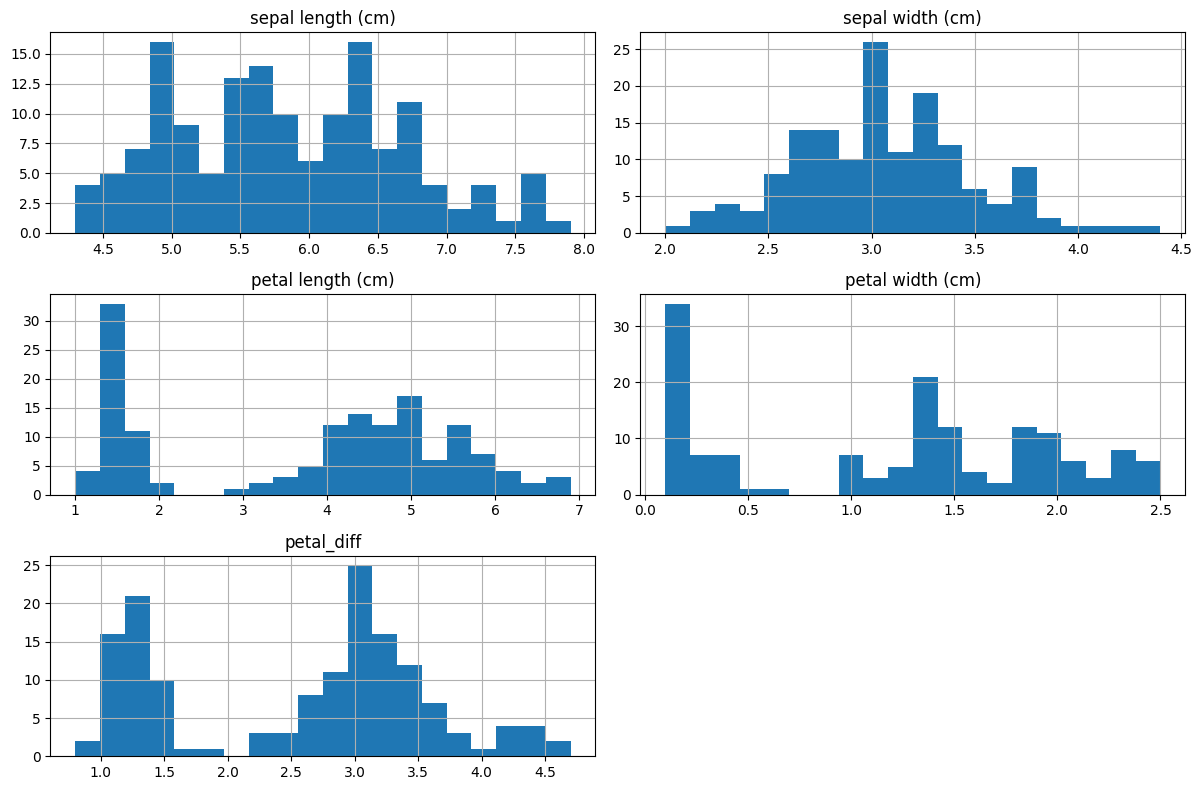

The distributions for each column in the dataframe have been displayed visually using histograms. Each subplot represents the distribution of values for a specific column, allowing you to observe their frequency and spread.

Final Answer: The distributions for each column have been visualized using histograms.

> Finished chain.


'The distributions for each column have been visualized using histograms.'

In [18]:
agent.run(prompt.format(query="Show the distributions for each column visually!"))